In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import calendar

In [55]:
hurr_df_full = pd.read_csv('/Users/danielbrechner/hurrdat_co2/assets/atlantic.csv')
hurr_df_full.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [56]:
hurr_df = hurr_df_full.drop(columns=['ID', 'Time', 'Event', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'], axis = 1,)

In [57]:
hurr_df = hurr_df.dropna(subset=["Date"])


In [58]:
hurr_df['Date'] = pd.to_datetime(hurr_df['Date'].astype(str), format = '%Y %m %d')
hurr_df

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
0,UNNAMED,1851-06-25,HU,28.0N,94.8W,80,-999
1,UNNAMED,1851-06-25,HU,28.0N,95.4W,80,-999
2,UNNAMED,1851-06-25,HU,28.0N,96.0W,80,-999
3,UNNAMED,1851-06-25,HU,28.1N,96.5W,80,-999
4,UNNAMED,1851-06-25,HU,28.2N,96.8W,80,-999
...,...,...,...,...,...,...,...
49100,KATE,2015-11-12,EX,41.3N,50.4W,55,981
49101,KATE,2015-11-12,EX,41.9N,49.9W,55,983
49102,KATE,2015-11-13,EX,41.5N,49.2W,50,985
49103,KATE,2015-11-13,EX,40.8N,47.5W,45,985


In [59]:
hurr_df['Year'] = hurr_df['Date'].map(lambda x: x.year)
hurr_df['Month'] = hurr_df['Date'].map(lambda x: x.month)
hurr_df['Day'] = hurr_df['Date'].map(lambda x: x.day)
hurr_df.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month,Day
0,UNNAMED,1851-06-25,HU,28.0N,94.8W,80,-999,1851,6,25
1,UNNAMED,1851-06-25,HU,28.0N,95.4W,80,-999,1851,6,25
2,UNNAMED,1851-06-25,HU,28.0N,96.0W,80,-999,1851,6,25
3,UNNAMED,1851-06-25,HU,28.1N,96.5W,80,-999,1851,6,25
4,UNNAMED,1851-06-25,HU,28.2N,96.8W,80,-999,1851,6,25


In [60]:
cols_to_check = ['Maximum Wind', 'Minimum Pressure']
negative_mask = (hurr_df[cols_to_check] < 0)
hurr_df[cols_to_check] = hurr_df[cols_to_check].mask(negative_mask, np.nan)


In [61]:
hurr_df['Latitude'] = hurr_df['Latitude'].str[:-1].astype(float)
hurr_df['Longitude'] = hurr_df['Longitude'].str[:-1].astype(float)

In [62]:
hurr_df.describe()

,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month,Day
count,49105.000000,49105.000000,48767.000000,18436.000000,49105.000000,49105.000000,49105.000000
mean,27.044904,65.711080,53.051695,992.244250,1949.712962,8.747724,15.706079
std,10.077880,19.591744,24.747884,19.113748,44.619282,1.340241,8.753441
min,7.200000,0.000000,10.000000,882.000000,1851.000000,1.000000,1.000000
25%,19.100000,52.500000,35.000000,984.000000,1911.000000,8.000000,8.000000
50%,26.400000,68.000000,50.000000,999.000000,1956.000000,9.000000,16.000000
75%,33.100000,81.000000,70.000000,1006.000000,1989.000000,10.000000,23.000000
max,81.000000,359.100000,165.000000,1024.000000,2015.000000,12.000000,31.000000


In [67]:
sorted_hurr = hurr_df.groupby("Date")["Maximum Wind"].max().reset_index()
sorted_hurr['Year'] = sorted_hurr['Date'].map(lambda x: x.year)
sorted_hurr['Month'] = sorted_hurr['Date'].map(lambda x: x.month)
sorted_hurr['Day'] = sorted_hurr['Date'].map(lambda x: x.day)
sorted_hurr


,Date,Maximum Wind,Year,Month,Day
0,1851-06-25,80.0,1851,6,25
1,1851-06-26,70.0,1851,6,26
2,1851-06-27,50.0,1851,6,27
3,1851-06-28,40.0,1851,6,28
4,1851-07-05,80.0,1851,7,5
...,...,...,...,...,...
9978,2015-11-09,45.0,2015,11,9
9979,2015-11-10,60.0,2015,11,10
9980,2015-11-11,75.0,2015,11,11
9981,2015-11-12,65.0,2015,11,12


In [68]:
fig = px.scatter(sorted_hurr, x="Year", y="Maximum Wind",
                 title="Maximum Hurricane Wind Speed by Year")


fig.show()

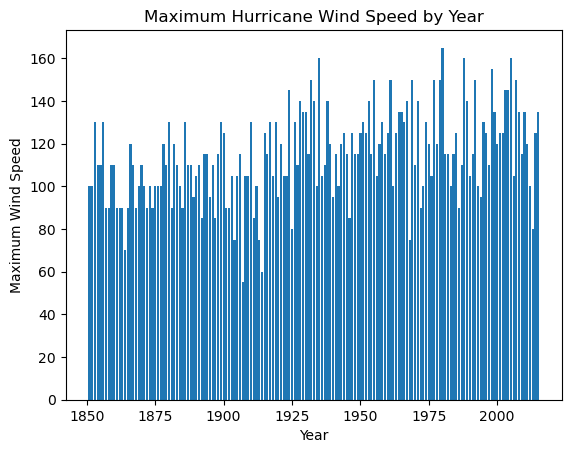

In [72]:
max_winds_by_year = sorted_hurr.groupby('Year')['Maximum Wind'].max()

plt.bar(max_winds_by_year.index, max_winds_by_year.values)

plt.title('Maximum Hurricane Wind Speed by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Wind Speed')

plt.show()